<a href="https://colab.research.google.com/github/AhmedAbdoulahi/DataScience/blob/master/TP2_reconnaissance_de_chiffres_manuscrits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X.shape
y.shape

(70000,)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from array import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

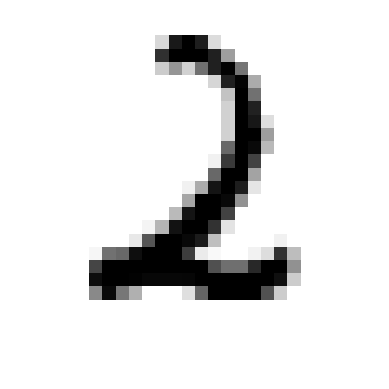

7

In [9]:
un_chiffre = np.array(X_train.loc[122,:])
un_chiffre_image = un_chiffre.reshape(28,28)
plt.imshow(un_chiffre_image, cmap="binary")
plt.axis("off")
plt.show()
y_train[123]

### **KNN**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [37]:
model_knn=KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 7],
    'weights': ['distance'],
    'metric': ['cosine']
}

# 3. Configuration de la validation croisée stratifiée
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 4. GridSearchCV
grid_search = GridSearchCV(
    estimator=model_knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [39]:

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['cosine'], 'n_neighbors': [3, 7],
                         'weights': ['distance']},
             scoring='accuracy', verbose=1)

In [40]:
# 6. Résultats
print("Meilleurs hyper-paramètres :", grid_search.best_params_)
print("Meilleure précision (cross-validation) :", grid_search.best_score_)


Meilleurs hyper-paramètres : {'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}
Meilleure précision (cross-validation) : 0.9748000000000001


In [41]:

# 7. Entraîner le modèle avec les meilleurs hyper-paramètres
model_knn = grid_search.best_estimator_
model_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=3, weights='distance')

In [42]:
# 8. Évaluer sur les données de test (si disponibles)
y_pred = model_knn.predict(X_test)
print("Précision sur les données de test :", accuracy_score(y_test, y_pred))

Précision sur les données de test : 0.9742


In [43]:
# Meilleure précision en validation croisée
cv_accuracy = grid_search.best_score_
cv_error = 1 - cv_accuracy

print(f"Précision moyenne en validation croisée : {cv_accuracy:.3f}")
print(f"Erreur moyenne en validation croisée : {cv_error:.3f}")


Précision moyenne en validation croisée : 0.975
Erreur moyenne en validation croisée : 0.025


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [45]:
# Générer les noms des classes à partir des labels uniques dans y_test
class_names = np.unique(y_test)  # Cela donne une liste triée des classes

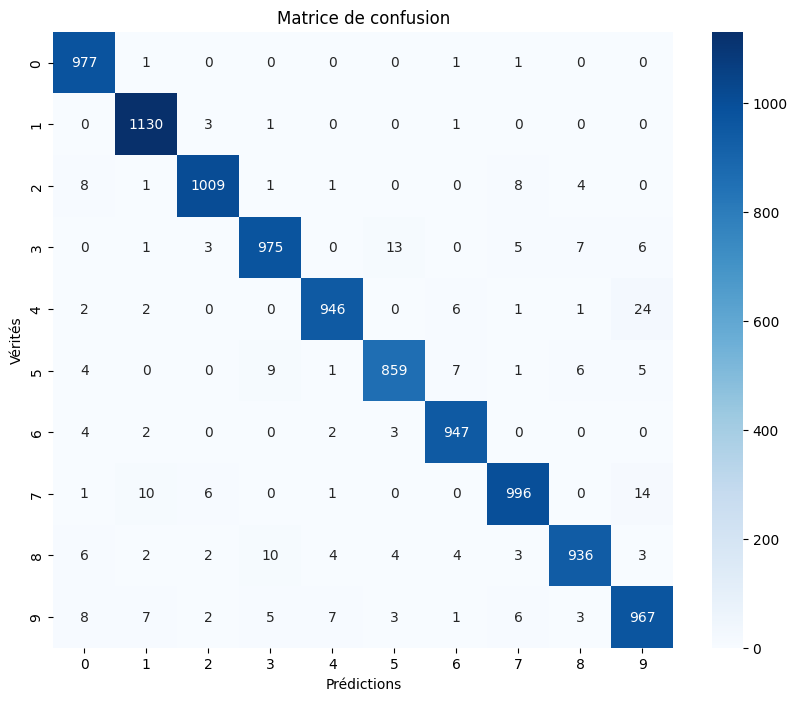

In [46]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion')
plt.show()


### **Régression logistique**

# Construire, en vous basant sur les mêmes sous-ensembles que précédemment pour la validation croisée, 10 classifieurs "1 contre tous" pour chacune des classes.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Initialisation du classifieur One-vs-Rest avec LogisticRegression
ova = OneVsRestClassifier(LogisticRegression(max_iter=100, random_state=42))

# Validation croisée stratifiée
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcul des scores en validation croisée
#cv_scores = cross_val_score(model, X_train, y_train, scoring='accuracy')

In [29]:
# Entraîner le modèle final sur toutes les données d'entraînement
ova.fit(X_train, y_train)

# Évaluer sur le jeu de test
y_pred = ova.predict(X_test)


In [30]:
# Calculer et afficher la précision
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur le jeu de test : {test_accuracy:.3f}")


Précision sur le jeu de test : 0.918


# Construire, en vous basant sur les mêmes sous-ensembles que précédemment pour la validation croisée, 45 classifieurs "1 contre 1" pour chaque paires de classes.

In [21]:
from sklearn.multiclass import OneVsOneClassifier

In [22]:
# Initialisation du classifieur One-vs-One avec LogisticRegression
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=100, solver='lbfgs', random_state=42))

In [23]:
# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcul des scores en validation croisée
cv_scores = cross_val_score(ovo_model, X_train, y_train, cv=cv, scoring='accuracy')

In [24]:
# Moyenne et écart-type des scores
print("Validation croisée (10 splits) :")
print(f"Précision moyenne : {cv_scores.mean():.3f}")
print(f"Écart-type : {cv_scores.std():.3f}")

Validation croisée (10 splits) :
Précision moyenne : 0.923
Écart-type : 0.003


In [25]:
# Entraîner le modèle final sur toutes les données d'entraînement
ovo_model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_test_pred = ovo_model.predict(X_test)

In [26]:
# Calculer et afficher la précision
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Précision sur le jeu de test : {test_accuracy:.3f}")


Précision sur le jeu de test : 0.928


# **Combiner des prédictions**

Construire et évaluer un arbre de décision pour prédire la classe d'une image à partir des entrées suivantes :

    la prédiction du classifieur Cknn,
    les prédictions des 10 classifieurs "1 contre tous" et
    les prédictions des 45 classifieurs "1 contre 1".


In [48]:
import numpy as np

# Supposons que X_test est le jeu de test
# Prédictions de chaque classifieur
cknn_pred = model_knn.predict(X_test)
ova_pred = ova.predict(X_test)
ovo_pred = ovo_model.predict(X_test)

# Construire un tableau de caractéristiques où chaque ligne contient les prédictions
X_combined = np.column_stack([cknn_pred, ova_pred, ovo_pred])


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [50]:
# Séparation en train/test
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_test, test_size=0.3, random_state=42)

In [51]:
# Initialisation et entraînement de l'arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_combined, y_train_combined)


DecisionTreeClassifier(random_state=42)

In [52]:
# Prédiction avec l'arbre de décision
y_pred_tree = tree_model.predict(X_test_combined)

In [55]:
# Évaluation des performances de l'arbre de décision
accuracy = accuracy_score(y_test_combined, y_pred_tree)
print(f"Précision de l'arbre de décision : {accuracy:.3f}")

Précision de l'arbre de décision : 0.970


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


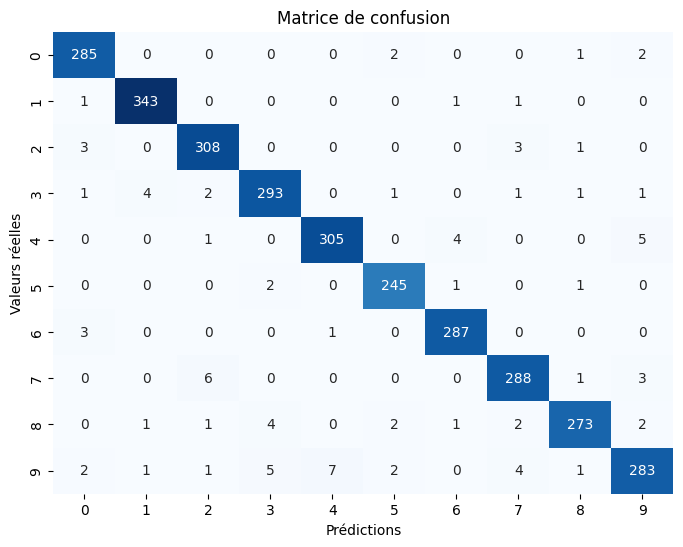

In [54]:

conf_matrix = confusion_matrix(y_test_combined, y_pred_tree)

# Afficher la matrice de confusion avec une heatmap de Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)
plt.title("Matrice de confusion")
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()


# **Logistic regression**

Construire et évaluer modele de regression logistique pour prédire la classe d'une image à partir des entrées suivantes :

    la prédiction du classifieur Cknn,
    les prédictions des 10 classifieurs "1 contre tous" et
    les prédictions des 45 classifieurs "1 contre 1".



In [57]:
# Initialisation du classifieur One-vs-Rest avec LogisticRegression
lr = LogisticRegression(max_iter=100, random_state=42)

# Entraîner le modèle final sur toutes les données d'entraînement
lr.fit(X_train_combined, y_train_combined)

# Prédictions sur le jeu de test
y_test_pred = lr.predict(X_test_combined)

In [58]:
# Évaluation des performances de l'arbre de décision
accuracy = accuracy_score(y_test_combined, y_test_pred)
print(f"Précision de l'arbre de décision : {accuracy:.3f}")

Précision de l'arbre de décision : 0.936
